['2023.05.30-09.43.18-2sec-left_to_right', '2023.05.30-09.43.18-2sec-multiple_cars', '2023.05.30-09.43.18-2sec-no_car', '2023.05.30-09.43.18-2sec-right_to_left']
0 [5, 3, 13, 9]
1 [4, 5, 7, 6]
2 [11, 7, 28, 23]
3 [6, 1, 2, 2]


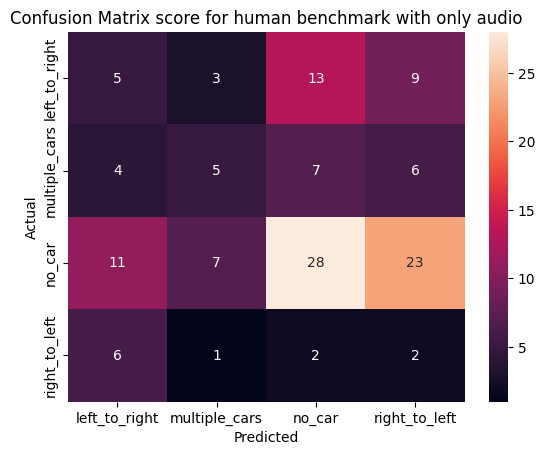

Accuracy of audio classification: 30.3 %


In [2]:
import os
import plotly.graph_objs as go
import numpy as np
import seaborn as sns

labels = os.listdir('dataset/labeled-from-video')

classified_file_names = {}
for label in labels:
    classified_file_names[label] = os.listdir('dataset/labeled-from-video/' + label)


labels_audio = os.listdir('dataset/labeled-from-audio')

classified_file_names_audio = {}
for label in labels_audio:
    classified_file_names_audio[label] = os.listdir('dataset/labeled-from-audio/' + label)

matrix={}
for label in labels:
    matrix[label] = {}
    for label_audio in labels_audio:
        matrix[label][label_audio] = 0
# compare the two dictionaries and get the accuracy of the audio classification
total_files = 0
total_correct = 0
total_found = 0
for label_audio in labels_audio:
    label_correct = 0
    for file in classified_file_names_audio[label_audio]:
        if file in classified_file_names[label_audio]:
            total_correct += 1
            label_correct += 1
        for label in labels:
            if file in classified_file_names[label]:
                matrix[label_audio][label] += 1
                total_found += 1
        total_files += 1

# plot the confusion matrix
import matplotlib.pyplot as plt
import numpy as np
keys = list(matrix.keys())
print(keys)
confusion_matrix = []
for i,j in zip(list(matrix.keys()),list(matrix.values())):
    print(keys.index(i),end=' ')
    print(list(j.values()))
    confusion_matrix.append(list(j.values()))

keys = [i[len("2023.05.30-09.43.18-2sec-"):] for i in keys]



confusion_matrix = np.array(confusion_matrix)
ax =plt.subplot()
sns.heatmap(confusion_matrix, ax=ax, annot=True, xticklabels=keys, yticklabels=keys)
ax.set_title('Human score with only audio')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()


print("Accuracy of audio classification:", round(100*total_correct/total_files,2),"%")